In [2]:
from matplotlib import pyplot as plt
import numpy as np

### Problem1——毛亦嘉（检查：洪图）

In [223]:
import numpy as np
from scipy import fftpack

N = 201 
dx = (9 - (-9)) / (N - 1) # [-9,9] is chosen since psi(x) almost goes to 0 when x = 9,-9
x = np.arange(-9, 9+dx, dx)
psi = np.exp(-(x**2)/3)*np.cos(2*x)
dpsi = fftpack.diff(psi, period=N*dx)

<font size = 4 color = black face = "Times New Roman"> The main purpose for the code above is to do the Fourier differentiation by  `scipy.fftpack.diff`for the function 
$$\psi(x)=e^{-\frac{x^2}{3}}cos2x$$
in section$[-9,9]$ by calculating the value of 201 points in the differential function. To completely include the whole function in the section $[-9,9]$, the parameter 'period' is chosen to be a little bit larger than the original section(parameter period: the period of the sequence x). Here section $[9,9]$ is chosen because $\psi(x)$ almost goes to 0 at x = $\pm9$. Though the original code already gives the numerical results, they are not visualized, so let's do a plotting.

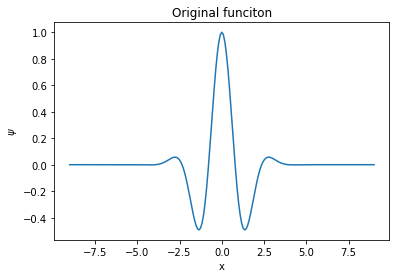

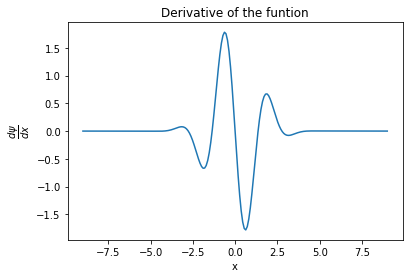

In [224]:
plt.plot(x,psi)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.title('Original funciton')
plt.show()
plt.plot(x,dpsi)
plt.xlabel('x')
plt.ylabel(r'$\dfrac{d\psi}{dx}$')
plt.title('Derivative of the funtion')
plt.show()

### Problem4——毛亦嘉（检查：洪图）

#### (a)

In [195]:
f=open('bounce.dat', "r+")
f.truncate() # Clear the file everytime I run the code

x = 1.0 # initial height of the ball
v = 0 # initial velocity of the ball
g = 9.8 # gravitational acceleration
t = 0 # initial time
dt = 0.01 # size of time step
# loop for 300 timesteps
for steps in range(300):
    t = t + dt
    x = x + v*dt
    v = v - g*dt
    # reflect the motion of the ball
    # when it hits the surface x=0
    if x < 0:
        x = -x
        v = -v
    # write out data at each time step
    with open("bounce.dat", "a+") as f:
        f.write("{} {} {}\n".format(t, x, v))

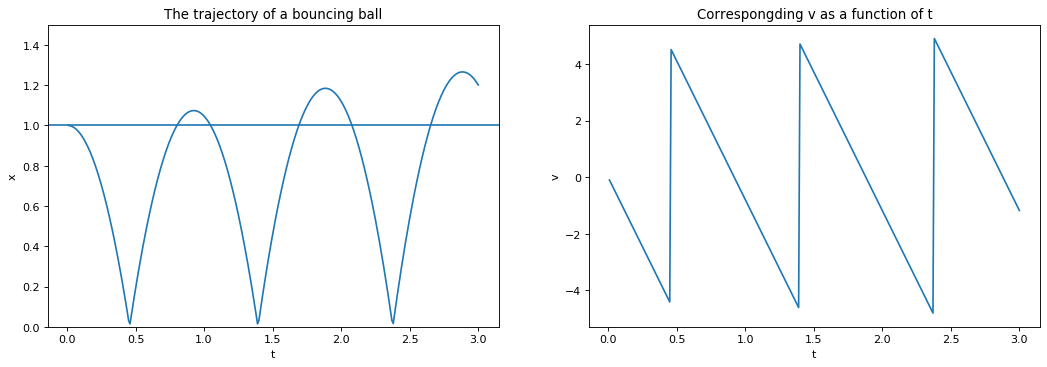

In [199]:
t, x, v = np.loadtxt('bounce.dat', unpack = True)
plt.figure(figsize=(16,5), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.axhline(y=1)
plt.ylim(0,1.5)
plt.title('The trajectory of a bouncing ball')

ax2 = plt.subplot(122)
ax2.plot(t,v)
plt.xlabel('t')
plt.ylabel('v')
plt.title('Correspongding v as a function of t')
plt.show()

<font size = 4 color = black face = "Times New Roman"> Clearly, the result is not physically correct. With only conserved force doing work, the ball can't bounce to higher and higher position. It totally breaks the energy conservation. Therefore, we try to figure out where the systematic error occurs and we find the part   

```
x=-x_last 
v=-v_last 
```  

<font size = 4 color = black face = "Times New Roman">
Here, directly reversing the sign of x and v is not very reasonalbe, since during this small dt the ball should first accelerate until $x=0$, then the speed reverses its sign. After that the ball should slow down with acceleration -$g$. However, if we directly reverse the sign, we assume that the whole process is accelerating, which means the v calculated will be larger than it should be. Meanwhile, the x calculated will also be affected. To avoid this problem, we use   


    
```
x=-x_last # The value of last x
v=-v_last # The value of last v
```  
 
<font size = 4 color = black face = "Times New Roman">
to replace this part. Though this solution will also cause error, the result will be much better, which can eliminate this problem.

In [200]:
f=open('bounce.dat', "r+")
f.truncate() # Clear the file everytime I run the code

x = 1.0 # initial height of the ball
v = 0 # initial velocity of the ball
g = 9.8 # gravitational acceleration
t = 0 # initial time
dt = 0.01 # size of time step
# loop for 300 timesteps
for steps in range(300):
    x_last = x
    v_last = v
    t = t + dt
    x = x + v*dt
    v = v - g*dt
    # reflect the motion of the ball
    # when it hits the surface x=0
    if x < 0:
        x = -x_last # This part is changed.
        v = -v_last
    # write out data at each time step
    with open("bounce.dat", "a+") as f:
        f.write("{} {} {}\n".format(t, x, v))

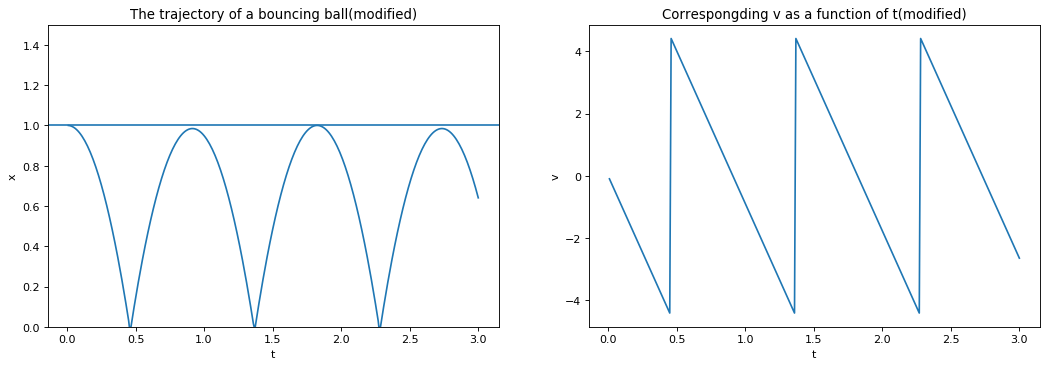

In [202]:
t, x, v = np.loadtxt('bounce.dat', unpack = True)
plt.figure(figsize=(16,5), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.axhline(y=1)
plt.ylim(0,1.5)
plt.title('The trajectory of a bouncing ball(modified)')

ax2 = plt.subplot(122)
ax2.plot(t,v)
plt.xlabel('t')
plt.ylabel('v')
plt.title('Correspongding v as a function of t(modified)')
plt.show()

<font size = 4 color = black face = "Times New Roman"> Here we can find that the result becomes much better. Though there still exists some error, it is due to Euler's method itself. Generally, systematical error is eliminated.<br>
(b)

For the case: dt =0.1


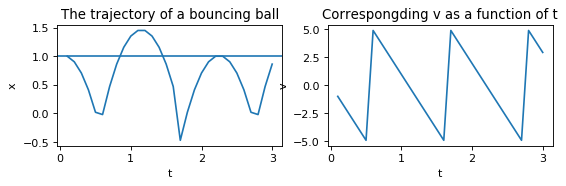

For the case: dt =0.01


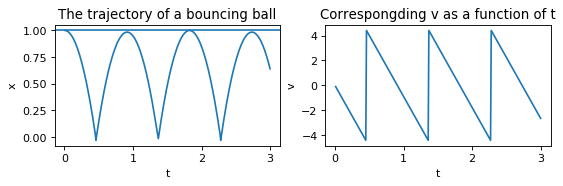

For the case: dt =0.001


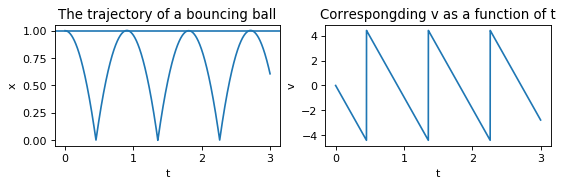

For the case: dt =0.0001


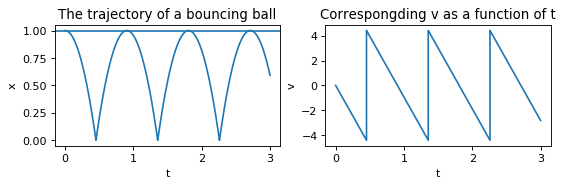

In [14]:
for dt in [0.1,0.01,0.001,0.0001]:
    f=open('bounce.dat', "r+")
    f.truncate() # Clear the file everytime I run the code
    x = 1.0 # initial height of the ball
    v = 0 # initial velocity of the ball
    g = 9.8 # gravitational acceleration
    t = 0
    
    for steps in range(int(3/dt)): #keep the same total evolution time
        x_last = x
        v_last = v
        t = t + dt
        x = x + v*dt
        v = v - g*dt
        # reflect the motion of the ball
        # when it hits the surface x=0
        if x < 0:
            x = -x_last # This part is changed.
            v = -v_last
        # write out data at each time step
        with open("bounce.dat", "a+") as f:
            f.write("{} {} {}\n".format(t, x, v))
    print(f'For the case: dt ={dt}')
    t, x, v = np.loadtxt('bounce.dat', unpack = True)
    plt.figure(figsize=(8,2), dpi=80)
    ax1 = plt.subplot(121)
    ax1.plot(t,x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('The trajectory of a bouncing ball')
    plt.axhline(y=1)
    ax2 = plt.subplot(122)
    ax2.plot(t,v)
    plt.xlabel('t')
    plt.ylabel('v')
    plt.title('Correspongding v as a function of t')
    plt.show() 

<font size = 4 color = black face = "Times New Roman"> We can find that the results for dt = 0.1 s not so good and the error for the results is larger, this is due to the fact that the Euler's method itself has error as mentioned before and the larger the step size for t is(low accuracy), the more obvious the error will be. Since the time required for the ball to fall down is $T =\sqrt{ \dfrac{2\times1}{g}}\approx 0.45$, which means only nine points are concerned in a single falling-down and bouncing-up process, which may greatly increase the inaccuracy. Process $dt = 0.01$ is just what we talked about before. As for $dt = 0.001, 0.0001$, with same evolution time, they behave bettre. It's clear that choosing more points can definitely reduce the error of the algorithm. In detail, they respectively choose 900 and 9000 points in a period. <br>
(c)

For the case: x =0.1


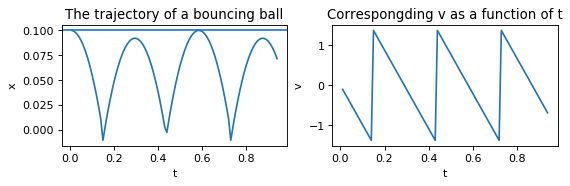

For the case: x =1


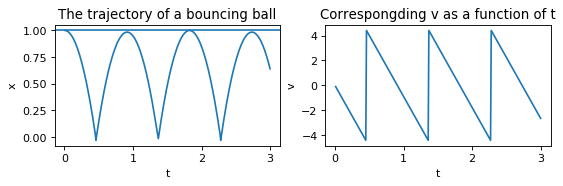

For the case: x =10


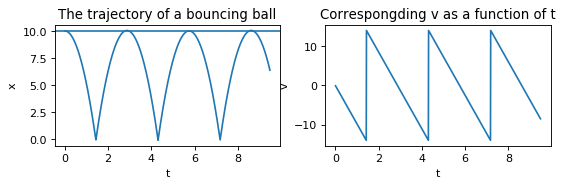

For the case: x =100


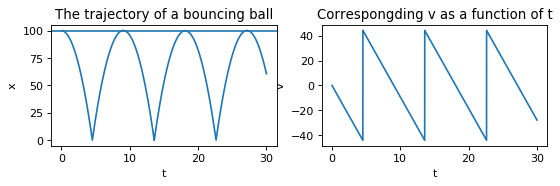

In [13]:
for x in [0.1,1,10,100]:
    f=open('bounce.dat', "r+")
    f.truncate() # Clear the file everytime I run the code
    x_initial = x
    v = 0 # initial velocity of the ball
    g = 9.8 # gravitational acceleration
    t = 0
    dt = 0.01
    for steps in range(int(300*np.sqrt(x))): 
    # Ajust the total evolution time with the change of x to obtain complete evolvement sqrt(x) is due to the formula shown below.
        x_last = x
        v_last = v
        t = t + dt
        x = x + v*dt
        v = v - g*dt
        # reflect the motion of the ball
        # when it hits the surface x=0
        if x < 0:
            x = -x_last # This part is changed.
            v = -v_last
        # write out data at each time step
        with open("bounce.dat", "a+") as f:
            f.write("{} {} {}\n".format(t, x, v))
    print(f'For the case: x ={x_initial}')
    t, x, v = np.loadtxt('bounce.dat', unpack = True)
    plt.figure(figsize=(8,2), dpi=80)
    ax1 = plt.subplot(121)
    ax1.plot(t,x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('The trajectory of a bouncing ball')
    plt.axhline(y=x_initial)
    ax2 = plt.subplot(122)
    ax2.plot(t,v)
    plt.xlabel('t')
    plt.ylabel('v')
    plt.title('Correspongding v as a function of t')
    plt.show() 

<font size = 4 color = black face = "Times New Roman"> Similarly to the case of the changing dt, when $x_{initial}$ is small, we can treat it like the case when dt is large, since this time, the time required for the ball to fall down is  $T_{0.1} =\sqrt{ \dfrac{2\times0.1}{g}}\approx 0.14$,which means only 14 points are concerned in a falling-down and bouncing-up process. This will make the error more obvious just like the case of $dt = 0.1$ before, but not so bad as that case . Process $x_{initial} = 1$ behaves just like before. As for $x_{initial} = 10, 100$, with enough evolvement, their behaviour are also better, with less **relative error**.The falling down of both cases respectively take $T_{10} =\sqrt{ \dfrac{2\times10}{g}}\approx 1.43$ and $T_{100} =\sqrt{ \dfrac{2\times100}{g}}\approx 4.52$. As a result, we pick about 286 and 904 in a period, which can obviously reduce the relative error. <br>
<font size = 4 color = black face = "Times New Roman">     
**We can conclude from the above that actually it is the the relation between the initial position and the step size of t that determines the relative error when applying Euler's method to solve this problem the higher$\dfrac{x_{initial}}{dt}$ is, the lower the relative error will be.**

For the case: v =-10


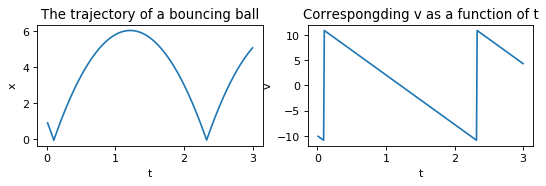

For the case: v =-5


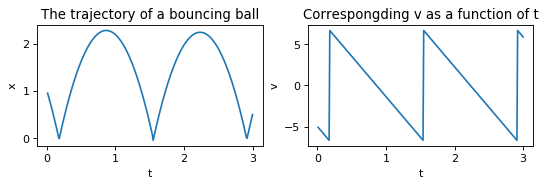

For the case: v =0


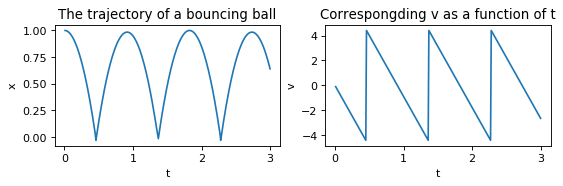

For the case: v =5


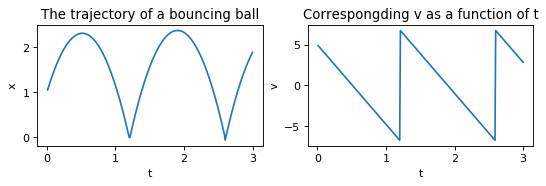

For the case: v =10


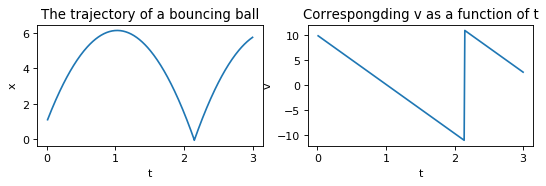

In [26]:
for v in [-10,-5,0,5,10]:
    f=open('bounce.dat', "r+")
    f.truncate() # Clear the file everytime I run the code
    v_initial = v
    x = 1.0 # initial height of the ball
    g = 9.8 # gravitational acceleration
    t = 0
    dt = 0.01
    for steps in range(300):
        x_last = x
        v_last = v
        t = t + dt
        x = x + v*dt
        v = v - g*dt
        # reflect the motion of the ball
        # when it hits the surface x=0
        if x < 0:
            x = -x_last # This part is changed.
            v = -v_last
        # write out data at each time step
        with open("bounce.dat", "a+") as f:
            f.write("{} {} {}\n".format(t, x, v))
    print(f'For the case: v ={v_initial}')
    t, x, v = np.loadtxt('bounce.dat', unpack = True)
    plt.figure(figsize=(8,2), dpi=80)
    ax1 = plt.subplot(121)
    ax1.plot(t,x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('The trajectory of a bouncing ball')
    ax2 = plt.subplot(122)
    ax2.plot(t,v)
    plt.xlabel('t')
    plt.ylabel('v')
    plt.title('Correspongding v as a function of t')
    plt.show() 

<font size = 4 color = black face = "Times New Roman"> From the plots above, it seems that the change of the initial velocity won't affect the error caused by the algorithm so obviously as the change of x or dt(though they may have some relationship). What it affects is actually:
1. The highest point it can reach, the higher the absolute value of the initial velocity is (maintian other conditions the same), the higher the highest point will be.
2. The initial direction it will move into: when the initial velocity is not greater than 0, it will first fall down; when it is larger than 0, it will firstly go up
3. The marximum velocity: it's clear that the higher the initial velocity is, the higher the maximum velocity will be.

<font size = 4 color = black face = "Times New Roman"> 
(d)

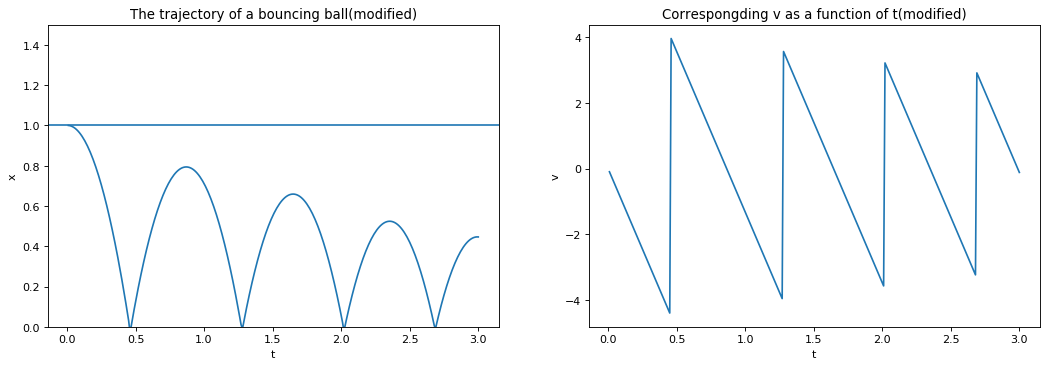

In [218]:
f=open('bounce.dat', "r+")
f.truncate() # Clear the file everytime I run the code

x = 1.0 # initial height of the ball
v = 0 # initial velocity of the ball
g = 9.8 # gravitational acceleration
t = 0 # initial time
dt = 0.01 # size of time step
# loop for 300 timesteps
for steps in range(300):
    x_last = x
    v_last = v
    t = t + dt
    x = x + v*dt
    v = v - g*dt
    # reflect the motion of the ball
    # when it hits the surface x=0
    if x < 0:
        x = -x_last
        v = -v_last *0.9 # Loss of 10% of speed after collision
    # write out data at each time step|
    with open("bounce.dat", "a+") as f:
        f.write("{} {} {}\n".format(t, x, v))

t, x, v = np.loadtxt('bounce.dat', unpack = True)
plt.figure(figsize=(16,5), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.axhline(y=1)
plt.ylim(0,1.5)
plt.title('The trajectory of a bouncing ball(modified)')

ax2 = plt.subplot(122)
ax2.plot(t,v)
plt.xlabel('t')
plt.ylabel('v')
plt.title('Correspongding v as a function of t(modified)')
plt.show()

<font size = 4 color = black face = "Times New Roman">
From the above two plottings, we can find that with the evolving of time, the highest point of the ball decreases and the maximum(minimum) speed of the ball decreases(increases), which is consistent with energy conservation.